In [106]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint



In [107]:
# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
# Create a pipeline for data preparation and prediction
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestRegressor())),
    ('regressor', RandomForestRegressor())
])


In [109]:
# Define hyperparameters for RandomizedSearchCV
param_dist = {
    'feature_selection__estimator__n_estimators': randint(10, 50),
    'regressor__n_estimators': randint(100, 500),
    'regressor__max_depth': randint(3, 7),
    'regressor__min_samples_split': randint(2, 10),
    'regressor__min_samples_leaf': randint(1, 10)
}


In [110]:
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [111]:
# Fit the model using RandomizedSearchCV
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('feature_selection',
                                              SelectFromModel(estimator=RandomForestRegressor())),
                                             ('regressor',
                                              RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'feature_selection__estimator__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000245A7505DB0>,
                                        'r...
                                        'regressor__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002459CBA6560>,
                                        'regressor__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002459CBA63B0>,
                                        'regressor__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002459CBA75B0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [112]:
# Get the best estimator and evaluate on the test set
best_estimator = random_search.best_estimator_
test_score = best_estimator.score(X_test, y_test)

In [113]:
print(f"Best model test score: {test_score}")
print(f"Best parameters: {random_search.best_params_}")

Best model test score: 0.5794614629451509
Best parameters: {'feature_selection__estimator__n_estimators': 48, 'regressor__max_depth': 6, 'regressor__min_samples_leaf': 8, 'regressor__min_samples_split': 6, 'regressor__n_estimators': 120}


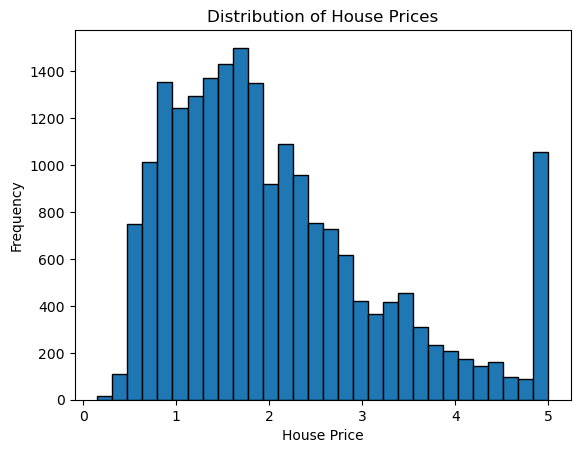

In [114]:
import matplotlib.pyplot as plt

plt.hist(y, bins=30, edgecolor='black')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()


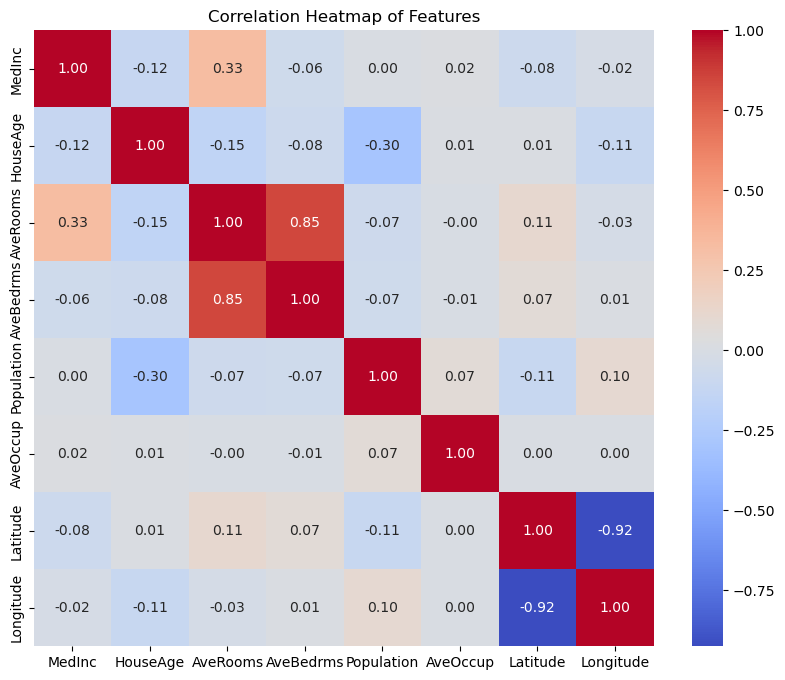

In [115]:
import seaborn as sns
import pandas as pd

# Create a DataFrame from X and feature names
feature_names = data.feature_names
X_df = pd.DataFrame(X, columns=feature_names)

# Compute the correlation matrix
corr_matrix = X_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


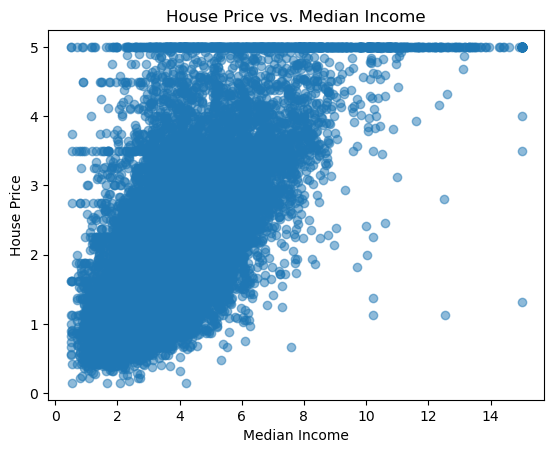

In [116]:
plt.scatter(X[:, feature_names.index('MedInc')], y, alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.title('House Price vs. Median Income')
plt.show()
